# Classification Using Tensorflow Keras

In [1]:
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,pandas,sklearn,seaborn,matplotlib,tensorflow -g

/home/hades/anaconda3/envs/test101/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CPython 3.7.3
IPython 7.9.0

numpy 1.18.1
pandas 1.0.3
sklearn 0.22.1
seaborn 0.9.0
matplotlib 3.1.1
tensorflow 2.2.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.4.0-18362-Microsoft
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : eb0297c20093800e4290ebfbcb3b7caced674806


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split

SEED = 43
np.random.random = SEED

In [4]:
df = pd.read_csv('../datasets/train.csv')

In [5]:
mainTest = pd.read_csv('../datasets/test.csv')

## PreScaling Data

In [6]:
X = df.loc[:, ~df.columns.isin(['blueFirstBlood', 'blueWins'])]
y = df['blueWins']
firstBld = df['blueFirstBlood']

In [7]:
X1 = mainTest.loc[:, ~mainTest.columns.isin(['blueFirstBlood', 'blueWins'])]
y1 = mainTest['blueWins']
firstBld1 = mainTest['blueFirstBlood']

In [8]:
ss = StandardScaler()
mm = MinMaxScaler()

In [9]:
Xstd = ss.fit_transform(X)
Xmm = mm.fit_transform(X)

In [10]:
df_ss = pd.DataFrame(Xstd, columns=X.columns)
df_mm = pd.DataFrame(Xmm, columns=X.columns)

In [11]:
df_ss = pd.concat([df_ss, firstBld], axis=1)
df_mm = pd.concat([df_mm, firstBld], axis=1)

In [12]:
ss1 = StandardScaler()
mm1 = MinMaxScaler()

test_ss = ss1.fit_transform(X1)
test_mm = mm1.fit_transform(X1)

test_ss = pd.DataFrame(test_ss, columns=X1.columns)
test_mm = pd.DataFrame(test_mm, columns=X1.columns)

test_ss = pd.concat([test_ss, firstBld1], axis=1)
test_mm = pd.concat([test_mm, firstBld1], axis=1)

## Analysis - UnScaled

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
y = keras.utils.to_categorical(y, 2)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'blueWins'], y, test_size=0.33, stratify=y, random_state=SEED)

### Using 1 Dense Layer `softmax`

In [16]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='softmax', input_dim=len(X.columns) + 1))
# model.add(keras.layers.Dense(2, activation='relu'))
# model.add(keras.layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 52        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

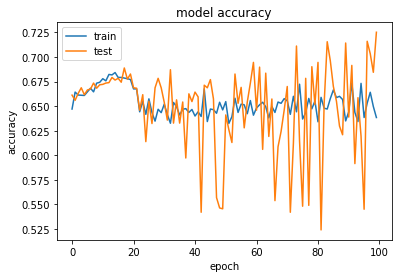

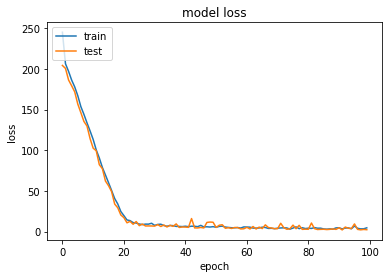

In [19]:
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

__Evaluate Model__

In [20]:
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(mainTest.loc[:, mainTest.columns!='blueWins'], y_true)

93/93 [==============================] - 0s 2ms/step - loss: 2.2937 - accuracy: 0.7088


[2.2936575412750244, 0.7088394165039062]

### Using 1 Dense Layer `relu`

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 52        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


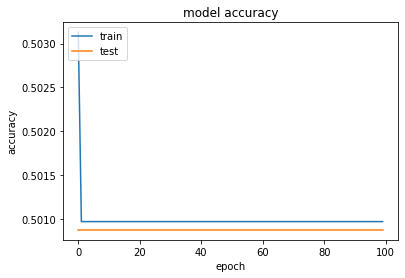

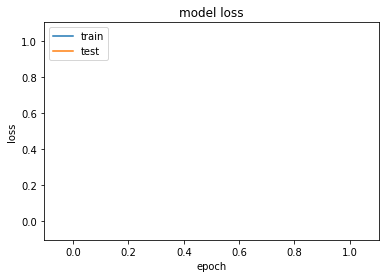

In [21]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_dim=len(X_test.columns)))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

__Evalute__

In [22]:
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(mainTest.loc[:, mainTest.columns!='blueWins'], y_true)

93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5010


[nan, 0.5010121464729309]

### Using 2 Dense Layer - `relu` and `softmax`

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 52        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


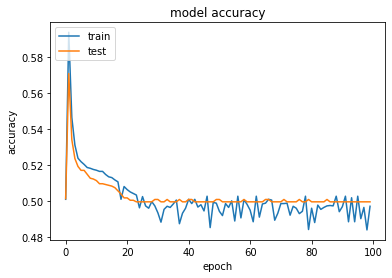

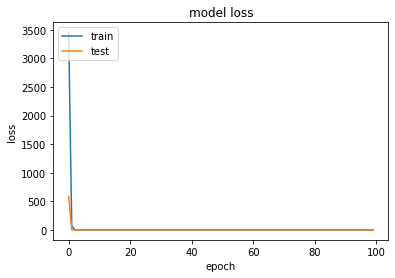

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_dim=len(X_test.columns)))
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

__Evaluate__

In [24]:
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(mainTest.loc[:, mainTest.columns!='blueWins'], y_true)

93/93 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5024


[0.6908083558082581, 0.5023616552352905]

### Using 2 Dense Layer - `softmax` and `sigmoid`

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 52        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


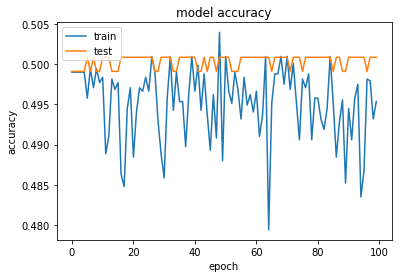

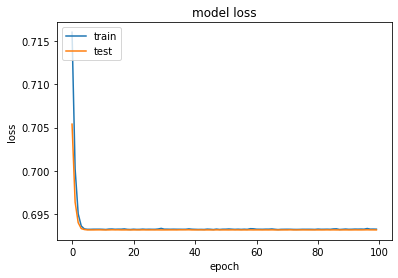

93/93 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5010


[0.6931456923484802, 0.5010121464729309]

In [25]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='softmax', input_dim=len(X_test.columns)))
model.add(keras.layers.Dense(2, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(mainTest.loc[:, mainTest.columns!='blueWins'], y_true)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 52        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6         
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


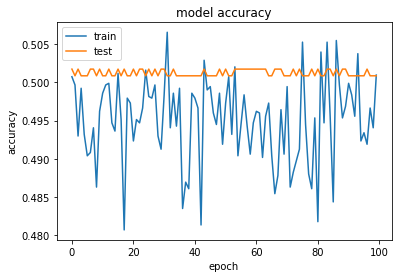

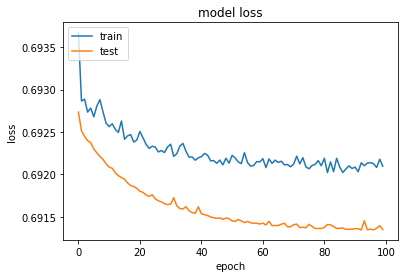

93/93 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5010


[0.6896861791610718, 0.5010121464729309]

In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='softmax', input_dim=len(X_test.columns)))
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(mainTest.loc[:, mainTest.columns!='blueWins'], y_true)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 52        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


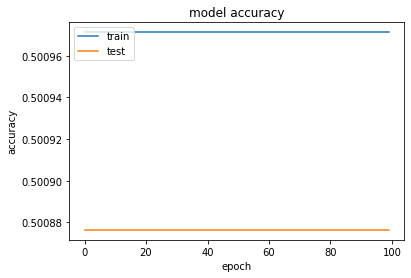

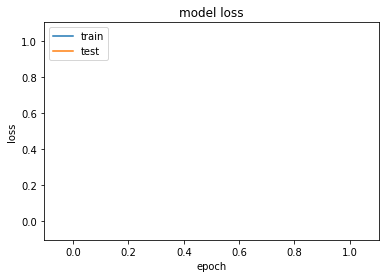

93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5010


[nan, 0.5010121464729309]

In [27]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='sigmoid', input_dim=len(X_test.columns)))
# model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(mainTest.loc[:, mainTest.columns!='blueWins'], y_true)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 10        
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


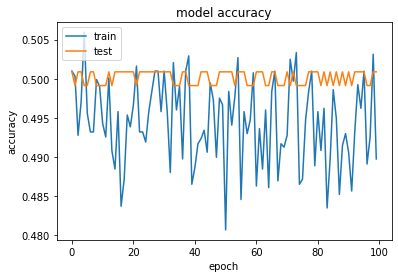

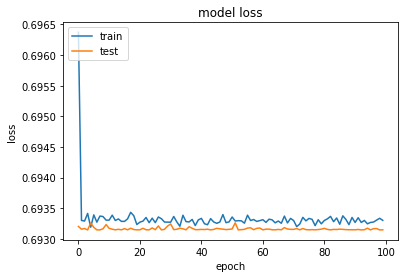

93/93 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5010


[0.6931462287902832, 0.5010121464729309]

In [28]:
model = keras.Sequential()
model.add(keras.layers.Dense(4, activation='softmax', input_dim=len(X_test.columns)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(2, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(mainTest.loc[:, mainTest.columns!='blueWins'], y_true)

## Standard Scale

In [ ]:
# y_cat = keras.utils.to_categorical(y, 2)
X_train, X_test, y_train, y_test = train_test_split(df_ss, y, test_size=0.33, stratify=y, random_state=SEED)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_dim=len(X_test.columns)))
# model.add(keras.layers.Dense(2, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(test_ss, y_true)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='softmax', input_dim=len(X_test.columns)))
# model.add(keras.layers.Dense(2, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(test_ss, y_true)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='softmax', input_dim=len(X_test.columns)))
model.add(keras.layers.Dense(2, activation='relu'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(test_ss, y_true)

## Min Max

In [ ]:
# y_cat = keras.utils.to_categorical(y, 2)
X_train, X_test, y_train, y_test = train_test_split(df_mm, y, test_size=0.33, stratify=y, random_state=SEED)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='softmax', input_dim=len(X_test.columns)))
# model.add(keras.layers.Dense(2, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(test_mm, y_true)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_dim=len(X_test.columns)))
# model.add(keras.layers.Dense(2, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(test_mm, y_true)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='softmax', input_dim=len(X_test.columns)))
model.add(keras.layers.Dense(2, activation='relu'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fits = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
plt.plot(fits.history['accuracy'])
plt.plot(fits.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fits.history['loss'])
plt.plot(fits.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
y_true = keras.utils.to_categorical(y1, 2)
model.evaluate(test_mm, y_true)

### Conclusion

The best configuration seems to be 1 dense layer with activation function `softmax` for Scaled data where as `relu` performed better with unscaled data.